# What do our likelihood curves look like for $\alpha$

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [44]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict

### 1. Example system

In [47]:
import numpy as np 
import logging 

logger = logging.getLogger().setLevel(logging.ERROR)

def iterate_over_alpha(alpha_guess,measurement_model,use_psr_terms_in_data,seed):



    P    = SystemParameters(h=1e-12,σp=None,σm=1e-11,measurement_model=measurement_model,use_psr_terms_in_data=use_psr_terms_in_data,seed=seed)       #define the system parameters as a class

    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P) # generate some synthetic data

    #Define the model 
    model = LinearModel(P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,PTA)

    # Run the KFwith the correct parameters
    true_parameters = priors_dict(PTA,P)
  
    true_parameters["alpha_gw"] = alpha_guess
    model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(true_parameters)


    return model_likelihood


import matplotlib.pyplot as plt 
import scienceplots

def plot_results(yc,x,savefig=None):


    plt.style.use('science')
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)


    

    ax.plot(x,yc,linestyle = 'solid')
            

    #config
    fs = 20
    ax.set_xlabel(r'$\alpha$', fontsize=fs)
    ax.set_ylabel(r'$\log \mathcal{L}$', fontsize=fs)

    ax.xaxis.set_tick_params(labelsize=fs-4)
    ax.yaxis.set_tick_params(labelsize=fs-4)


    









## Original example 

In [48]:
x = np.linspace(0.0,np.pi,1000)
yc = np.zeros(len(x))
for j in range(len(x)):
    yc[j] = iterate_over_alpha(x[j],measurement_model="pulsar",seed=1236,use_psr_terms_in_data=True)



(47,)
(47,)
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/t1/miniconda3/envs/KalmanGW/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/bx/dsrq957n43bckqdm1vkk78yc0000gn/T/ipykernel_94294/815381342.py", line 4, in <cell line: 3>
    yc[j] = iterate_over_alpha(x[j],measurement_model="pulsar",seed=1236,use_psr_terms_in_data=True)
  File "/var/folders/bx/dsrq957n43bckqdm1vkk78yc0000gn/T/ipykernel_94294/1822874253.py", line 25, in iterate_over_alpha
    model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(true_parameters)
  File "/Users/t1/github_repos/tmp/StateSpacePTA/notebooks/../py_src/kalman_filter.py", line 196, in likelihood
    x,P,l,ypred = update(x,P, self.observations[0,:],R,X_factor[0,:],f_EM[0,:])
  File "/Users/t1/github_repos/tmp/StateSpacePTA/notebooks/../py_src/kalman_filter.py", line 82, in update
    l = log_likelihood(S,y)
  File "/Use

In [31]:
ymax = np.abs(np.max(yc))
yc_norm = yc / ymax 

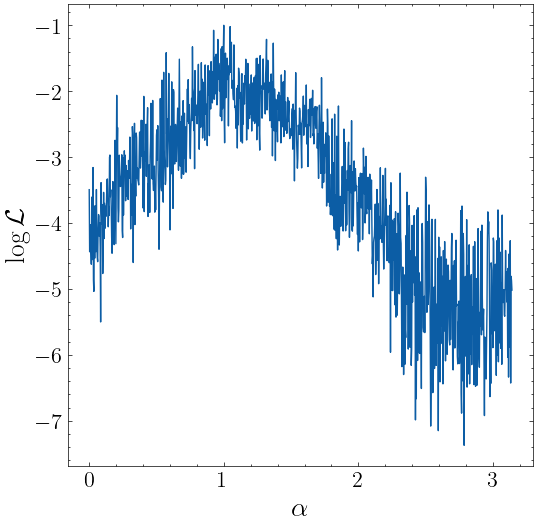

In [32]:
plot_results(yc_norm,x)

In [33]:
out_array = np.zeros((len(x),2))
out_array[:,0] = x 
out_array[:,1] = yc 

In [34]:
np.save('../data/canonical_p2_alpha_data',out_array)